# Document Summary

The target data is displayed and the imbalance is acknowledged.

Feature Data is pre processed 4 ways to cover all combinations of lemmatization, stemmatization, CountVectorization
and RFID Vectorization.

An initial LinearRegression model shows correlation between all preprocessed data and the target data, but this correlation
is not supported by the RSquared value.

All data is resampled using RandomUndersampler and all correlation is lost.

Document concludes that further investigation should follow regularization, non linear regression modelling and consider 
classification

In [ ]:
from TextMiningProcesses import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as pyplot
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.drop(columns='overall')
y_train = train['overall']
X_test = test.drop(columns='overall')
y_test = test['overall']

<class 'pandas.core.series.Series'>
RangeIndex: 43043 entries, 0 to 43042
Series name: overall
Non-Null Count  Dtype
--------------  -----
43043 non-null  int64
dtypes: int64(1)
memory usage: 336.4 KB


overall
5    0.452013
1    0.267035
4    0.134377
3    0.077411
2    0.069163
Name: proportion, dtype: float64

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


'\nWe can see that the data is not very well balanced and may wish to consider over or undersampling the data. from the size of the data it may be best to undersample.\n'

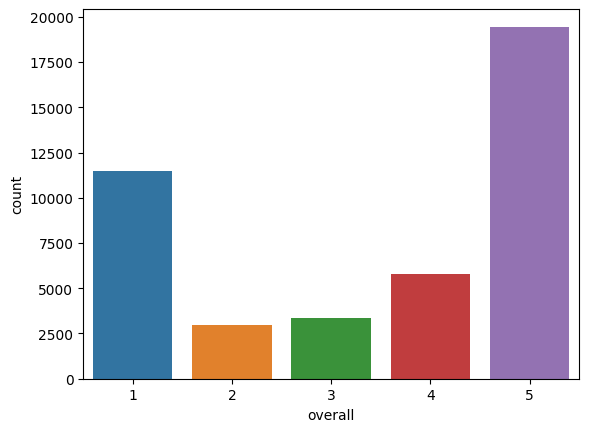

In [4]:
y_train.info()

display(y_train.value_counts(normalize=True))

sns.countplot(x=y_train)

We can see that the data is not very well balanced and may wish to consider over or undersampling the data. from the size of the data it may be best to undersample.

With two methods of tokenizing ands 2 methods of vectorizing the text fields, that gives us 4 potential cobinations to test the regression.
To test the regression we can use the LinearRegression model to check for a linear regression and we can use the crossvalidation to verify
any detected linear relationships.

First though we must identify and preprocess our 4 types of data

This cell could take a few minutes to run.

In [5]:
# Identify the column to be processed
X_train.info() # reviewText is the column name

# Lemmatized data
X_lem_train = column_lemmatizer(X_train['reviewText'])
X_lem_test = column_lemmatizer(X_test['reviewText'])

# Stemmatized data
X_stem_train = column_stemmatizer(X_train['reviewText'])
X_stem_test = column_stemmatizer(X_test['reviewText'])

# Lemmatized CountVectorized data
X_lem_CV_train, X_lem_CV_test = count_vectorize_data(X_lem_train, X_lem_test)
X_lem_CV_tr_dense, X_lem_CV_tst_dense = X_lem_CV_train.toarray(), X_lem_CV_test.toarray()

# Lemmatized TFIDVectorized data
X_lem_RFID_train, X_lem_RFID_test = tfidf_vectorize_data(X_lem_train, X_lem_test)
X_lem_RFID_tr_dense, X_lem_RFID_tst_dense = X_lem_RFID_train.toarray(), X_lem_RFID_test.toarray()

# Stemmatized CountVectorized data
X_stem_CV_train, X_stem_CV_test = count_vectorize_data(X_stem_train, X_stem_test)
X_stem_CV_tr_dense, X_stem_CV_tst_dense = X_stem_CV_train.toarray(), X_stem_CV_test.toarray()

# Stemmatized TFIDVectorized data
X_stem_RFID_train, X_stem_RFID_test = tfidf_vectorize_data(X_stem_train, X_stem_test)
X_stem_RFID_tr_dense, X_stem_RFID_tst_dense = X_stem_RFID_train.toarray(), X_stem_RFID_test.toarray()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43043 entries, 0 to 43042
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vote            43043 non-null  int64 
 1   verified        43043 non-null  bool  
 2   reviewTime      43043 non-null  object
 3   reviewerID      43043 non-null  object
 4   asin            43043 non-null  object
 5   reviewerName    43043 non-null  object
 6   reviewText      43043 non-null  object
 7   summary         43043 non-null  object
 8   unixReviewTime  43043 non-null  int64 
 9   reviewYear      43043 non-null  int64 
 10  reviewMonth     43043 non-null  int64 
 11  reviewDay       43043 non-null  int64 
 12  category        43043 non-null  object
 13  description     43043 non-null  object
 14  title           43043 non-null  object
 15  brand           42533 non-null  object
 16  feature         43043 non-null  object
 17  rank            43043 non-null  object
 18  main_c

In [18]:
# Lemmatized, CountVectorized LinearRegression results
lr_l_cv = LinearRegression()
lr_l_cv.fit(X_lem_CV_train, y_train)
print(f'Lemmatized, CountVectorized Linear Regression Score = {lr_l_cv.score(X_lem_CV_train, y_train)}')

lem_CV_R2 = cross_validate(lr_l_cv, X_lem_CV_train, y_train, return_train_score=True, cv=5)
print(f'Lemmatized, CountVectorized RSquared = {lem_CV_R2["test_score"].mean()}')


Lemmatized, CountVectorized Linear Regression Score = 0.8157758272439622
Lemmatized, CountVectorized RSquared = -6.489040137724392


In [19]:
# Lemmatized, TFIDVectorized LinearRegression results
lr_l_rfid = LinearRegression()
lr_l_rfid.fit(X_lem_RFID_train, y_train)
print(f'Lemmatized, TFIDVectorized Linear Regression Score = {lr_l_rfid.score(X_lem_RFID_train, y_train)}')

lem_RFID_R2 = cross_validate(lr_l_rfid, X_lem_RFID_train, y_train, return_train_score=True, cv=5)
print(f'Lemmatized, TFIDVectorized RSquared = {lem_RFID_R2["test_score"].mean()}')

Lemmatized, TFIDVectorized Linear Regression Score = 0.8494204300381947
Lemmatized, TFIDVectorized RSquared = -1.3952842087046053


In [20]:
# Stemmatized, CountVectorized LinearRegression results
lr_st_cv = LinearRegression()
lr_st_cv.fit(X_stem_CV_train, y_train)
print(f'Stemmatized, CountVectorized Linear Regression Score = {lr_st_cv.score(X_stem_CV_train, y_train)}')

stem_CV_R2 = cross_validate(lr_st_cv, X_stem_CV_train, y_train, return_train_score=True, cv=5)
print(f'Stemmatized, CountVectorized RSquared = {lem_CV_R2["test_score"].mean()}')

Stemmatized, CountVectorized Linear Regression Score = 0.7441425421404138
Stemmatized, CountVectorized RSquared = -6.489040137724392


In [21]:
# Stemmatized, TFIDVectorized LinearRegression results
lr_st_rfid = LinearRegression()
lr_st_rfid.fit(X_stem_RFID_train, y_train)
print(f'Stemmatized, TFIDVectorized Linear Regression Score = {lr_st_rfid.score(X_stem_RFID_train, y_train)}')

stem_RFID_R2 = cross_validate(lr_st_rfid, X_stem_RFID_train, y_train, return_train_score=True, cv=5)
print(f'Stemmatized, TFIDVectorized RSquared = {stem_RFID_R2["test_score"].mean()}')

Stemmatized, TFIDVectorized Linear Regression Score = 0.7932024625977865
Stemmatized, TFIDVectorized RSquared = -0.35223606460073287


Lemmatized, CountVectorized Linear Regression Score = 0.8157758272439622  
Lemmatized, CountVectorized RSquared = -6.489040137724392

Lemmatized, TFIDVectorized Linear Regression Score = 0.8494204300381947  
Lemmatized, TFIDVectorized RSquared = -1.3952842087046053

Stemmatized, CountVectorized Linear Regression Score = 0.7441425421404138  
Stemmatized, CountVectorized RSquared = -1.9675956343679446

Stemmatized, TFIDVectorized Linear Regression Score = 0.7932024625977865  
Stemmatized, TFIDVectorized RSquared = -0.35223606460073287

Across the board we can see that the RSquared values are not suppoprting the detected regression lines.
Before we go any further, let us address the imbalance in the target values and sample the data to ensure
that this is not disrupting our calculations.
Oversampling will be ruled out due to the amount of data we have, instead we will use RandomUnderSampling.

The shape of the vectorized data could be changed by the sampling process, so we could consider starting over
and sampling when the data is close to its original format, however, since the vectorisation is already completed
and the computational time was not awful for the existing datasets I am happy to sample the lemmatized/
stemmatized, CountVectorized/RFIDVectorized datasets

In [16]:
# Under Sample data
rUs = RandomUnderSampler()
X_ru_lem_CV_tr, y_ru_train = rUs.fit_resample(X_lem_CV_train, y_train)
X_ru_lem_RFID_tr, y_ru_train = rUs.fit_resample(X_lem_RFID_train, y_train)
X_ru_stem_CV_tr, y_ru_train = rUs.fit_resample(X_stem_CV_train, y_train)
X_ru_stem_RFID_tr, y_ru_train = rUs.fit_resample(X_stem_RFID_train, y_train)


In [22]:
# UnderSampled Lemmatized, CountVectorized LinearRegression results
lr_l_cv_ru = LinearRegression()
lr_l_cv_ru.fit(X_ru_lem_CV_tr, y_ru_train)
print(f'UnderSampled Lemmatized, CountVectorized Linear Regression Score = {lr_l_cv_ru.score(X_lem_CV_train, y_train)}')

lem_CV_R2 = cross_validate(lr_l_cv_ru, X_lem_CV_train, y_train, return_train_score=True, cv=5)
print(f'UnderSampled Lemmatized, CountVectorized RSquared = {lem_CV_R2["test_score"].mean()}')

UnderSampled Lemmatized, CountVectorized Linear Regression Score = -139.53741142311395
UnderSampled Lemmatized, CountVectorized RSquared = -6.489040137724392


In [23]:
# UnderSampled Lemmatized, TFIDVectorized LinearRegression results
lr_l_rfid_ru = LinearRegression()
lr_l_rfid_ru.fit(X_ru_lem_RFID_tr, y_ru_train)
print(f'UnderSampled Lemmatized, TFIDVectorized Linear Regression Score = {lr_l_rfid_ru.score(X_lem_RFID_train, y_train)}')

lem_RFID_R2 = cross_validate(lr_l_rfid_ru, X_lem_RFID_train, y_train, return_train_score=True, cv=5)
print(f'UnderSampled Lemmatized, TFIDVectorized RSquared = {lem_RFID_R2["test_score"].mean()}')

UnderSampled Lemmatized, TFIDVectorized Linear Regression Score = -35.32888700597642
UnderSampled Lemmatized, TFIDVectorized RSquared = -1.3952842087046053


In [24]:
# UnderSampled Stemmatized, CountVectorized LinearRegression results
lr_st_cv_ru = LinearRegression()
lr_st_cv_ru.fit(X_ru_stem_CV_tr, y_ru_train)
print(f'UnderSampled Stemmatized, CountVectorized Linear Regression Score = {lr_st_cv_ru.score(X_stem_CV_train, y_train)}')

stem_CV_R2 = cross_validate(lr_st_cv_ru, X_stem_CV_train, y_train, return_train_score=True, cv=5)
print(f'UnderSampled Stemmatized, CountVectorized RSquared = {lem_CV_R2["test_score"].mean()}')

UnderSampled Stemmatized, CountVectorized Linear Regression Score = -7.966979079538623
UnderSampled Stemmatized, CountVectorized RSquared = -6.489040137724392


In [25]:
# UnderSampled Stemmatized, TFIDVectorized LinearRegression results
lr_st_rfid_ru = LinearRegression()
lr_st_rfid_ru.fit(X_ru_stem_RFID_tr, y_ru_train)
print(f'UnderSampled Stemmatized, TFIDVectorized Linear Regression Score = {lr_st_rfid_ru.score(X_stem_RFID_train, y_train)}')

stem_RFID_R2 = cross_validate(lr_st_rfid_ru, X_stem_RFID_train, y_train, return_train_score=True, cv=5)
print(f'UnderSampled Stemmatized, TFIDVectorized RSquared = {stem_RFID_R2["test_score"].mean()}')

UnderSampled Stemmatized, TFIDVectorized Linear Regression Score = -1.9531003145546673
UnderSampled Stemmatized, TFIDVectorized RSquared = -0.35223606460073287


UnderSampled Lemmatized, CountVectorized Linear Regression Score = -139.53741142311395  
UnderSampled Lemmatized, CountVectorized RSquared = -6.489040137724392

UnderSampled Lemmatized, TFIDVectorized Linear Regression Score = -35.32888700597642  
UnderSampled Lemmatized, TFIDVectorized RSquared = -1.3952842087046053

UnderSampled Stemmatized, CountVectorized Linear Regression Score = -7.966979079538623  
UnderSampled Stemmatized, CountVectorized RSquared = -6.489040137724392

UnderSampled Stemmatized, TFIDVectorized Linear Regression Score = -1.9531003145546673  
UnderSampled Stemmatized, TFIDVectorized RSquared = -0.35223606460073287

The random sampling has destroyed the false correlation we saw before and also confirmed the poor RSquared value

As next steps it would make sense to try a gradientboosting regressor, and non linear models using a GridsearchCV.
If we cannot find a regression model to suit our data as it is, then we should consider using regularisation
to remove less important array locations from the calculations, such as the lasso regularisation and also consider
making additions to our stop words function in preprocessing.